# Машинное обучение и интеллектуальные системы. 
## Семинар 4. Логистическая регрессия. Градиентный спуск

#### План семинара
- Линейная регрессия
- Категориальные переменные
- Классификация с её помощью
- Логистическая регрессия
- Бинарная кросс-энтропия. Max-likelihood
- Max-likelihood для линейной регресии
- Градиентный спуск
- OVR
- Softmax-регрессия
- Кросс-энтропия
- Интерпретация весов

Линейный классификатор - это модель, принимающая решение о классе для примера данных, основываясь на линейных комбинациях признаков (атрибутов). Параметры линейных моделей называются **весами** (коэффициентами) и **смещениями**.

Классификаторы бывают **бинарными** и **небинарными (multiclass)**. Бинарный классификатор предсказывает один из двух классов, небинарный - один из нескольких.

Начнём с бинарной классификации, позже перейдём к небинарной

### Модель линейной регрессии. Градиентный спуск.

Тренировочные примеры данных собраны в матрицу $X$, в которой $n$ примеров и $m$ вещественных атрибутов
$$ X \in \mathbb{R}^{n \times m}$$
Примеры корректных ответов собраны в вектор $\pmb{y}$
$$ \pmb{y} \in \mathbb{R}^{n}$$

Модель для заданного примера $\pmb{x}$ (как во время обучения, так и после) предсказывает значение $\hat{y}$ следующим образом:
$$\hat{y} = \pmb{w} \cdot \pmb{x} + b = \sum_{j=1}^m{w_jx_j} + b$$ 

Где $\pmb{w}$ - веса модели, а $b$ - смещение (bias) модели (значение $\hat{y}$ при $\pmb{x} = \pmb{0})$

Для решения задачи регрессии при помощи линейной модели необходимо подобрать значения весов $\pmb{w}$ и смещение $b$, при которых модель лучше всего приближает тренировочные данные (best fit).

Для этого используется критерий MSE (Mean squared error) - среднее квадратов ошибок.
Мы считаем предсказания модели $\pmb{\hat{y}}$ на тренировочных данных $X$:
$$\hat{y}^{(i)} = \pmb{w} \cdot \pmb{x^{(i)}} + b$$
или
$$\pmb{\hat{y}} = X\pmb{w} + b$$ 
MSE имеет вид:
$$L(\pmb{y},\pmb{\hat{y}}) = \frac{1}{n}\sum_{i=1}^n(y^{(i)} - \hat{y}^{(i)})^2 = \frac{1}{n}\sum_{i=1}^n(y^{(i)} - (\pmb{w} \cdot \pmb{x^{(i)}} + b))^2$$
Задачу можно решить аналитически. Для этого уберем смещение $b$ и вместо него введем новый столбец в матрице $X$, состоящий из единиц, a также новый вес заместо $b$, обозначаемый $w_{m+1}$.
Тогда:
$$\pmb{\hat{y}} = X\pmb{w}$$
или:
$ \begin{pmatrix} y_1 \\ ... \\ y_n  \end{pmatrix} = \begin{pmatrix}x^{(1)}_1 & ... & x^{(1)}_m & 1 \\ ... & ... & ... & ... \\  x^{(n)}_1 & ... & x^{(n)}_m & 1\end{pmatrix} \begin{pmatrix} w_1 \\ ... \\ w_m \\ w_{m+1} \end{pmatrix}$

Минимум функции (за счёт её выпуклости для линейной модели) находится в единственной стационарной точке, которую можно найти, решив уравнение:
$$\underset{\pmb{w}}{\nabla} L(X,\pmb{y};\pmb{w}) = \pmb{0}$$
Формула градиента:
$$\underset{\pmb{w}}{\nabla} L(X,\pmb{y};\pmb{w}) = 2X^T(X\pmb{w}-\pmb{y}) = 2X^TX\pmb{w}-2X^{T}\pmb{y}$$
Подставив его в уравнение, получим:
$$\pmb{w} = (X^TX)^{-1}X^T\pmb{y}$$

Наличие аналитического решения - достаточно редкий случай в более сложных непрерывных моделях. Также как его наличие не обязательно даёт нам самую быструю процедуру вычисления оптимальных параметров.

### Обработка категориальных признаков
Модель предполагает взвешивание значений атрибутов у поданного на вход примера данных. Это не очень сочетается с данными, где атрибуты имеют не количественную, а качественную природу. Рассмотрим пример:

У нас имеются данные об уровне образования человека (школа, университет, аспирантура). Также у нас имеется информации о его опыте работы (лет). Необходимо построить модель, предсказывающую его заработную плату (предположим, что мы строим модель, инвариантную сфере занятости или для одной конкретной сферы).


Сгенерируем данные для этой задачи в виде таблицы pandas

In [1]:
import pandas as pd
import numpy as np

In [4]:
n_examples = 30
edu_levels = ["school", "university", "phd"]

examples = []
for i in range(n_examples):
    experience = np.random.random() * 25
    edu_level = edu_levels[np.random.choice(len(edu_levels))]
    
    basic_salary = 18_000
    salary = basic_salary + 3_000 * max(experience,10)
    
    if edu_level == "university":
        salary += np.random.normal(30_000, 10_000)
    elif edu_level == "phd":
        salary += np.random.normal(40_000, 10_000)
    
    noise = np.random.normal(0, scale=2_000)
    
    salary = max(salary + noise, basic_salary)
    examples.append([edu_level, experience, salary])

salary_df = pd.DataFrame.from_records(examples,columns=["education", "experience", "salary"])

In [5]:
salary_df

,education,experience,salary
0,phd,5.371563,90109.245836
1,school,21.908500,85926.228387
2,phd,2.994490,96580.343376
3,university,8.341099,59613.552249
4,school,7.332693,45459.777013
5,phd,20.431857,139278.263708
6,school,24.996499,93451.216835
7,university,17.228907,85126.996080
8,school,19.127617,76795.848857
9,phd,6.807975,87858.052412


In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Назначим каждой категории уникальный номер (метку) 

In [7]:
label_encoder = LabelEncoder().fit(salary_df["education"])

In [8]:
salary_df["edu_label"] = label_encoder.transform(salary_df["education"])

In [10]:
salary_df.sample(5)

,education,experience,salary,edu_label
10,school,15.822194,64123.040313,1
13,school,0.825607,42714.271909,1
9,phd,6.807975,87858.052412,0
14,school,21.347536,81987.970943,1
3,university,8.341099,59613.552249,2


К сожалению, такой подход нельзя использовать для обучения линейной модели, потому что взвешивание метки предполагает, что одна из категорий "больше" другой.

In [11]:
import seaborn as sns

In [12]:
import plotly.graph_objects as go
import plotly.express as px

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


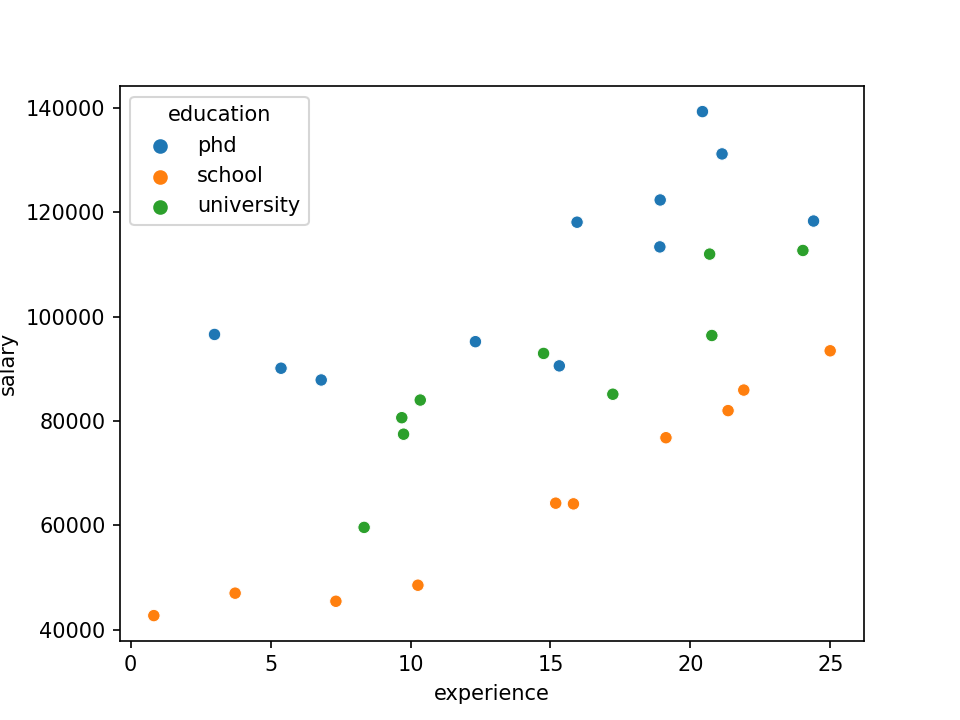

In [14]:
sns.scatterplot(data=salary_df, x="experience", y="salary",hue="education")

Общий подход к обработке категориальной переменной с $v$ значениями - это разбиение её на $v$ или $v - 1$ бинарных переменных

### One-hot кодировка
Разбиение на $v$ значений превратит переменную $education$ в три переменные 
$$\text{education}=\text{phd} (0,1)$$
$$\text{education}=\text{school} (0,1)$$
$$\text{education}=\text{university} (0,1)$$
Можно заметить, что переменная превращается в трехмерный вектор:

phd=(1,0,0)<br>
university=(0,1,0)<br>
school=(0,0,1)

Такая кодировка называется one-hot кодировкой, потому что только одна из новых переменных имеет значение 1.

Рассмотрим формулу линейной регрессии при one-hot кодировке переменной
$$\text{salary} = w_1 * \text{experience} + w_2*\text{phd} + w_3*\text{university} + w_4*\text{school} + b$$

величину $w_2*\text{phd}$ можно рассматривать как некоторый прирост к базовой зарплате $(w_1 * \text{experience} + b$), связанный с наличием у человека образования в аспирантуре. 

Однако, здесь существует проблема. Напомним, в одном примере ненулевое значение имеет только одна из бинарных переменных в one-hot кодировке. Поэтому для любого $\alpha$ можно получить такое же значение $\text{salary}$ через формулу:
$$\text{salary} = w_1 * \text{experience} + (\alpha + w_2*\text{phd})+ (\alpha + w_3*\text{university}) + (\alpha + w_4*\text{school}) + (b - \alpha)$$

Таким образом, при one-hot кодировке полученные коэффициенты не являются интерпретируемыми. Тем не менее, не все модели нуждаются в интерпретации.

### Dummy кодировка

Dummy-кодировка похожа на one-hot кодировку с одним отличием - заводятся новые переменные только под $v - 1$ значений. Оставшаяся переменная считается "значением по-умолчанию" и в выученной модели её значение является одним из слагаемых смещения $b$.
$$w_1 * \text{experience} + w_2*\text{phd} + w_3*\text{university} + b$$

Интерпретация коэффициентов в данном случае означает прирост (или падение) относительно значения по-умолчанию. Конкретно в этой задаче, если убрать переменную school - относительно среднего уровня образования. 

Рассмотрим пример:

In [15]:
salary_df_one_hot = pd.get_dummies(salary_df,columns=["education"])

In [17]:
salary_df_one_hot.sample(5)

,experience,salary,edu_label,education_phd,education_school,education_university
5,20.431857,139278.263708,0,1,0,0
7,17.228907,85126.996080,2,0,0,1
3,8.341099,59613.552249,2,0,0,1
25,20.688771,111975.816728,2,0,0,1
27,21.132362,131167.317096,0,1,0,0


Обучим модель со смещением и всеми уровнями категориальной переменной и без смещения, но только 2 уровнями категориальной переменной

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr_salary_df = salary_df_one_hot.drop(["edu_label"],axis=1).sort_values(["experience"]).reset_index(drop=True)

In [20]:
lr_salary_df.head(5)

,experience,salary,education_phd,education_school,education_university
0,0.825607,42714.271909,0,1,0
1,2.994490,96580.343376,1,0,0
2,3.731636,47011.416870,0,1,0
3,5.371563,90109.245836,1,0,0
4,6.807975,87858.052412,1,0,0


In [21]:
lr1 = LinearRegression(fit_intercept=False)
lr1.fit(lr_salary_df.drop(["salary"], axis=1).values, lr_salary_df["salary"].values)

LinearRegression(fit_intercept=False)

In [22]:
lr1.coef_

array([ 2203.07294191, 76793.11626784, 34063.19730472, 55790.84765376])

In [23]:
lr1.intercept_

0.0

<IPython.core.display.Javascript object>


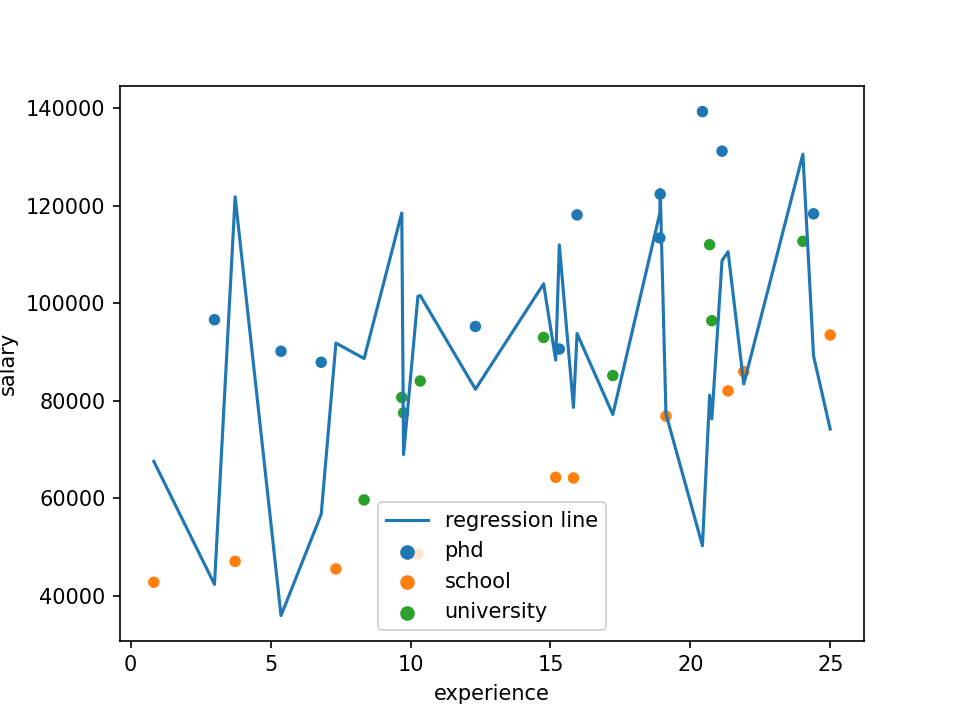

In [24]:
fig = plt.figure()
sns.scatterplot(data=salary_df, x="experience", y="salary",hue="education")
sns.lineplot(data=salary_df,
             x="experience", 
             y=lr1.predict(lr_salary_df.drop(["salary"], axis=1)), label="regression line")


<IPython.core.display.Javascript object>


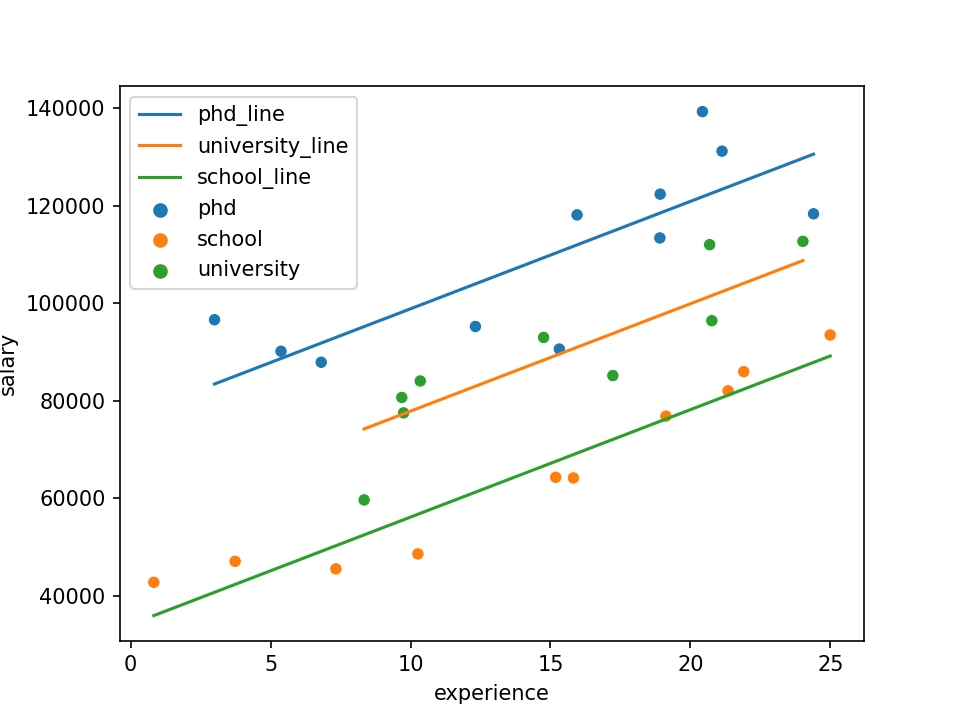

In [25]:
fig = plt.figure()
sns.scatterplot(data=salary_df, x="experience", y="salary",hue="education")

df = lr_salary_df.drop(["salary"], axis=1).loc[lr_salary_df.education_phd == 1]

sns.lineplot(data=df,
             x="experience", 
             y=lr1.predict(df.values), label="phd_line")

# fig.add_trace(go.Scatter(
#     x=df["experience"],
#     y=lr1.predict(df.values)))

df = lr_salary_df.drop(["salary"], axis=1).loc[lr_salary_df.education_university == 1]
sns.lineplot(data=df,
             x="experience", 
             y=lr1.predict(df.values), label="university_line")


df = lr_salary_df.drop(["salary"], axis=1).loc[lr_salary_df.education_school == 1]
sns.lineplot(data=df,
             x="experience", 
             y=lr1.predict(df.values), label="school_line")



In [26]:
lr2 = LinearRegression(fit_intercept=True)
lr2.fit(lr_salary_df.drop(["salary", "education_school"], axis=1).values, lr_salary_df["salary"].values)

LinearRegression()

In [27]:
lr1.coef_

array([ 2203.07294191, 76793.11626784, 34063.19730472, 55790.84765376])

In [28]:
lr2.coef_

array([ 2203.07294191, 42729.91896312, 21727.65034904])

In [29]:
lr2.intercept_

34063.19730471995

In [30]:
lr2.coef_ + np.array([0,1,1]) * lr2.intercept_

array([ 2203.07294191, 76793.11626784, 55790.84765376])

<IPython.core.display.Javascript object>


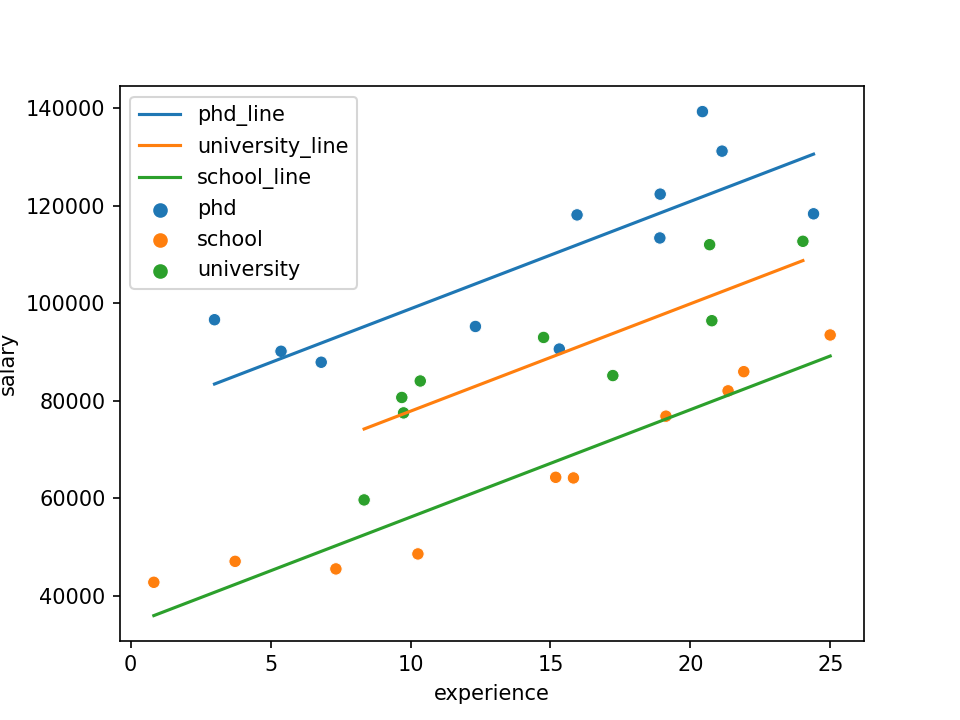

In [31]:

fig = plt.figure()
sns.scatterplot(data=salary_df, x="experience", y="salary",hue="education")

df = lr_salary_df.drop(["salary","education_school"], axis=1).loc[lr_salary_df.education_phd == 1]

sns.lineplot(data=df,
             x="experience", 
             y=lr2.predict(df.values), label="phd_line")

df = lr_salary_df.drop(["salary", "education_school"], axis=1).loc[lr_salary_df.education_university == 1]
sns.lineplot(data=df,
             x="experience", 
             y=lr2.predict(df.values), label="university_line")


df = lr_salary_df.drop(["salary", "education_school"], axis=1).loc[(lr_salary_df.education_university == 0)
                                               & (lr_salary_df.education_phd == 0)]

sns.lineplot(data=df,
             x="experience", 
             y=lr2.predict(df.values), label="school_line")

### Ландшафт функции потерь и градиентный спуск
Давайте посмотрим на функцию потерь для датасета davis, где мы предсказываем одну величину только по одной другой. Функция в таком случае оптимизируется только по скалярным параметрам $w$ и $b$

$$L(\pmb{x}, \pmb{y}; w,b) = \frac{1}{n}\sum_{i=1}^n(y_i - wx_i - b)^2$$

In [32]:
davis_df = pd.read_csv("datasets_68743_137592_Davis.csv")

In [33]:
davis_train = davis_df[:40]

In [34]:
davis_train = davis_train[davis_train["height"] > 140]

<IPython.core.display.Javascript object>


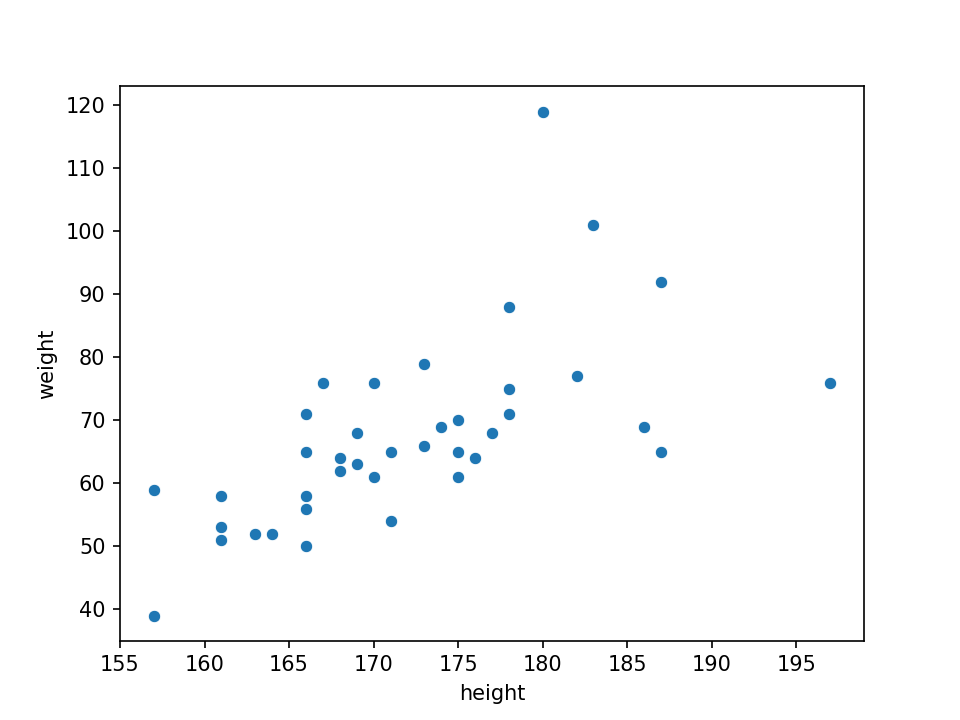

In [35]:
sns.scatterplot(data=davis_train,x="height",y="weight")

Возьмем значения $w$ в интервале () и значения $b$ в интервале...

In [36]:
ww,bb = np.mgrid[0:2:200j, -200:200:200j]

In [37]:
from tqdm.notebook import tqdm

In [38]:
ww,bb = np.mgrid[0:2:200j, -200:200:200j]
L = []
heights = davis_train['height'].values.astype(np.float64)
weights = davis_train['weight'].values.astype(np.float64)
for w, b in zip(ww.ravel(),bb.ravel()):
    L.append(1/len(heights) * np.sum((weights - w * heights - b)**2))
L = np.array(L)

In [39]:
from mpl_toolkits.mplot3d import Axes3D

In [40]:
%matplotlib notebook

In [41]:
lr = LinearRegression().fit(heights.reshape(-1,1),weights)

In [42]:
lr.coef_

array([1.05271499])

In [43]:
lr.intercept_

-113.76334112756558

<IPython.core.display.Javascript object>


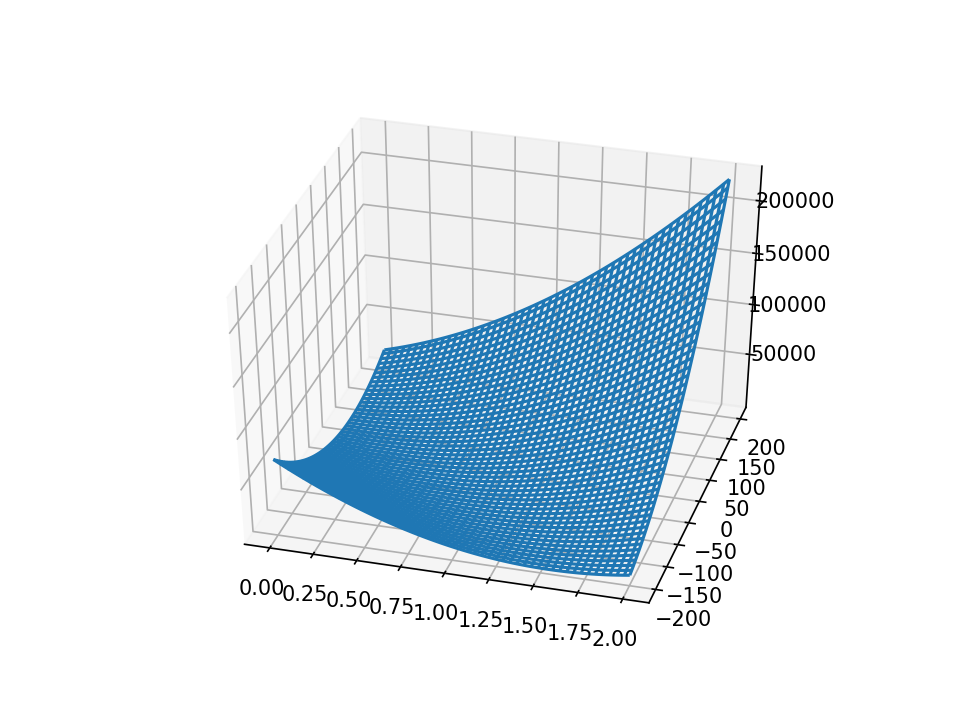

In [48]:
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, L.reshape(ww.shape))

In [45]:
ww.shape

(200, 200)

In [46]:
bb.shape

(200, 200)

<IPython.core.display.Javascript object>


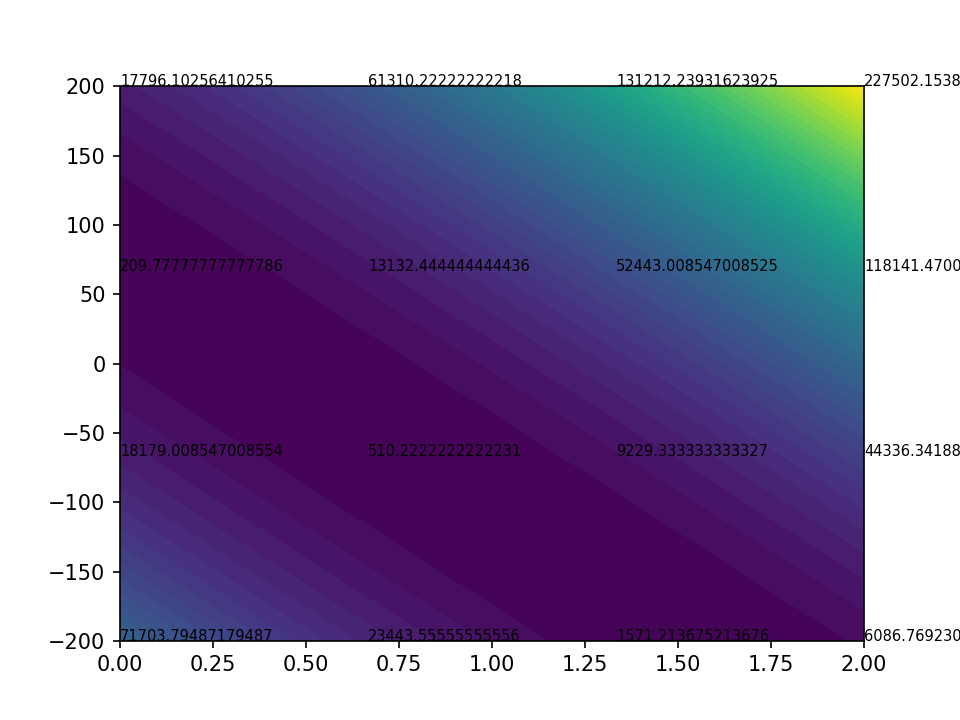

In [47]:
plt.contourf(ww,bb,L.reshape(ww.shape),levels=50)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)

for w in (www):
    for b in bbb:
        plt.text(w,b, 1/len(heights) * np.sum((weights - w * heights - b)**2), fontsize=7)



Градиентный спуск - простой метод поиска локальных минимумов и максимумов дифференцируемых функций.

Алгоритм начинает работу со случайной точки (в нашем случае - это точка в пространстве параметров модели (весов и смещений).

Негативный градиент указывает направление наискорейшего убывания функции. Двигаясь вдоль него с небольшим шагом мы можем уменьшить значение функции относительно значения в текущей точке. 

Таким образом. Пусть мы хотим оптимизировать функцию $L$ совокупность наших параметров обозначается вектором $\pmb{\theta}$.

Мы начинаем с точки $\pmb{\theta}_0$

Далее, для каждого шага $t$ производим следующую итерацию:
$$\large{ \pmb{\theta}_{t} = \pmb{\theta}_{t-1} - \alpha \underset{\pmb{\pmb{\theta}_{t-1}}}{\nabla} L(\pmb{\theta}_{t-1})}$$

Где $\alpha$ - малое положительное число, которых в machine learning называется скоростью обучения (learning rate)

Попробуем применить алгоритм к текущей задаче. Градиент можно считать эмпирически, через определение производных, а можно аналитически. Эмпирическая оценка частной производной может считаться так:
$$\frac{\partial L}{\partial \theta_i} \approx \frac{L(\theta_1,...\theta_i + \alpha, ..., \theta_m) - L(\theta_1,...\theta_i, ..., \theta_m)}{\alpha}$$

Аналитически посчитать его можно следующим образом для нашей задачи:
$$L(\pmb{x}, \pmb{y}; w,b) = \frac{1}{n}\sum_{i=1}^n(y_i - wx_i - b)^2$$
$$\pmb{\theta} = \{ w,b\}$$
$$\frac{\partial L}{\partial w} = \frac{2}{n}\sum_{i=1}^n(wx_i + b -y_i)*x_i$$
$$\frac{\partial L}{\partial b} = \frac{2}{n}\sum_{i=1}^n(wx_i + b -y_i)*1$$

Для конкретного параметра, например $b$, градиентный спуск работает в момент итерации так:
$$b_{t+1} = b_{t} - \alpha \frac{\partial L}{\partial b}$$

Реализуем градиентный спуск наивно

In [49]:
w = 1
b = 0
alpha = 0.0001

x = heights
N = len(x)
y = weights
for t in range(1000):
    l = (1/N * np.sum((y - w * x - b)**2))
    
    d_yh = (w * x + b - y)
    
    d_w = np.mean(d_yh * x)
    d_b = np.mean(d_yh)
    if t % 50 == 0:
        print("w,b = ",w,b)
        print("L = ", l)
        print("d_w, d_b", d_w, d_b)
        print("------------------")
    w = w - alpha * d_w
    b = b - alpha * d_b
    

w,b =  1 0
L =  11085.820512820512
d_w, d_b 18011.128205128207 104.6923076923077
------------------
w,b =  310718796876563.6 1801079511943.3137
L =  2.866299359310981e+33
d_w, d_b 9.224427635527854e+18 5.34693355881944e+16
------------------
w,b =  1.5913510557479935e+29 9.224256181565006e+26
L =  7.518279837851755e+62
d_w, d_b 4.724304678065469e+33 2.7384401746450934e+31
------------------
w,b =  8.150128695420646e+43 4.724216867656985e+41
L =  1.9720386684884205e+92
d_w, d_b 2.4195598440416554e+48 1.4024963107575985e+46
------------------
w,b =  4.1741008379007266e+58 2.419514871807064e+56
L =  5.172641340688369e+121
d_w, d_b 1.2391812632406494e+63 7.182906239474816e+60
------------------
w,b =  2.1377721084028037e+73 1.2391582306421385e+71
L =  1.3567796041193893e+151
d_w, d_b 6.346485733544267e+77 3.678736382359272e+75
------------------
w,b =  1.0948632447900774e+88 6.346367771739816e+85
L =  3.5588218337778496e+180
d_w, d_b 3.2503623449525107e+92 1.8840704472126434e+90
----------

/home/ivan/Programming/Python/general37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ivan/Programming/Python/general37/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':


In [50]:
w = 1
b = 0
alpha = 0.0001

x = heights
N = len(x)
y = weights

max_norm = 5
for t in range(10000):
    l = (1/N * np.sum((y - w * x - b)**2))
    d_yh = (w * x + b - y)
    
    d_w = np.mean(d_yh * x)
    d_b = np.mean(d_yh)
    
    norm = np.sqrt(d_w**2 + d_b**2)

        
    if t % 50 == 0:
        print("w,b = ",w,b)
        print("L = ", l)
        print("d_w, d_b", d_w, d_b)
        print("------------------")

    if norm > max_norm:
        reciprocal = norm / max_norm
        d_w /= reciprocal
        d_b /= reciprocal
    w = w - alpha * d_w
    b = b - alpha * d_b

w,b =  1 0
L =  11085.820512820512
d_w, d_b 18011.128205128207 104.6923076923077
------------------
w,b =  0.975000422373651 -0.00014532207032327436
L =  10203.803502991566
d_w, d_b 17268.956121915526 100.39031197407255
------------------
w,b =  0.950000844852526 -0.0002906622411102365
L =  9358.89572072478
d_w, d_b 16526.784038711896 96.08831625584357
------------------
w,b =  0.9250012674463085 -0.00043602217546007685
L =  8551.097166019199
d_w, d_b 15784.611955518607 91.78632053762395
------------------
w,b =  0.9000016901660831 -0.0005814037767678721
L =  7780.407838873717
d_w, d_b 15042.439872337176 87.48432481941768
------------------
w,b =  0.8750021130246196 -0.0007268092373700965
L =  7046.827739287045
d_w, d_b 14300.26778916946 83.18232910122988
------------------
w,b =  0.8500025360367336 -0.0008722411001591527
L =  6350.356867257708
d_w, d_b 13558.095706017688 78.880333383067
------------------
w,b =  0.8250029592197486 -0.0010177023375508507
L =  5690.9952227839885
d_w, d_

w,b =  0.39331216798169333 -0.047530809766444165
L =  158.2013628786493
d_w, d_b -7.419073137063892 0.24780148062186322
------------------
w,b =  0.3933178523398139 -0.04851033370313299
L =  158.20079308080335
d_w, d_b -7.41887856071061 0.2478001035402301
------------------
w,b =  0.3933235357146104 -0.04948984923688928
L =  158.20022330662167
d_w, d_b -7.41871172974491 0.24779856565413821
------------------
w,b =  0.39332921823928585 -0.050469356363796646
L =  158.19965355412873
d_w, d_b -7.4185686891711065 0.2477968898887031
------------------
w,b =  0.39333490002805294 -0.05144885508026202
L =  158.19908382163115
d_w, d_b -7.418446047816366 0.24779509590084395
------------------
w,b =  0.3933405811788414 -0.052428345383034626
L =  158.19851410767671
d_w, d_b -7.418340897935807 0.24779320054529252
------------------
w,b =  0.3933462617756202 -0.05340782726920483
L =  158.19794441102073
d_w, d_b -7.418250746298338 0.24779121827405176
------------------
w,b =  0.39335194189038664 -0.05

w,b =  0.3937492616958263 -0.12292948888325556
L =  158.1575239477841
d_w, d_b -7.417713732831351 0.24761654292931412
------------------
w,b =  0.3937549357336872 -0.12390836361796848
L =  158.15695500230186
d_w, d_b -7.417713814997849 0.24761403917112526
------------------
w,b =  0.3937606097226665 -0.12488722992085959
L =  158.1563860666212
d_w, d_b -7.417713897358628 0.24761153543337308
------------------
w,b =  0.3937662836627655 -0.12586608779200148
L =  158.15581714074196
d_w, d_b -7.417713979891932 0.24760903171618273
------------------
w,b =  0.39377195755398503 -0.12684493723146684
L =  158.155248224664
d_w, d_b -7.417714062582047 0.24760652801964675
------------------
w,b =  0.39377763139632666 -0.1278237782393281
L =  158.15467931838708
d_w, d_b -7.417714145395493 0.24760402434395737
------------------
w,b =  0.39378330518979154 -0.12880261081565786
L =  158.15411042191107
d_w, d_b -7.417714228310411 0.2476015206892423
------------------
w,b =  0.3937889789343804 -0.12978143

In [51]:
hw_df = pd.DataFrame({"height": heights, "weight": weights})

In [52]:
hw_df.head(4)

,height,weight
0,182.0,77.0
1,161.0,58.0
2,161.0,53.0
3,177.0,68.0


In [53]:
%matplotlib inline

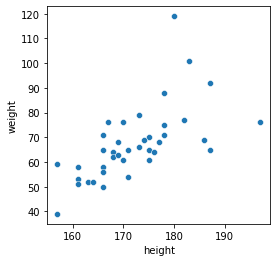

In [54]:
fig=plt.figure(figsize=(4,4))
sns.scatterplot(x="height",y="weight",data=hw_df)

In [55]:
hw_df.mean()

height    172.076923
weight     67.384615
dtype: float64

In [56]:
hw_df.std()

height     8.826946
weight    14.655007
dtype: float64

In [57]:
hw_df_n = (hw_df - hw_df.mean()) / hw_df.std()

In [58]:
hw_df_n.sample(4)

,height,weight
37,0.671022,1.406713
35,-0.688451,-0.776841
5,-0.235294,0.587880
4,-1.708057,-0.572133


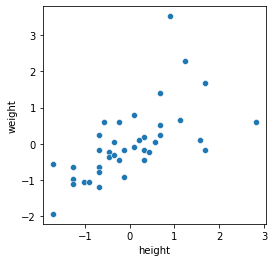

In [59]:
fig=plt.figure(figsize=(4,4))
sns.scatterplot(x="height",y="weight",data=hw_df_n)

In [60]:
heights_n, weights_n = hw_df_n['height'].values, hw_df_n['weight'].values

In [61]:
ww,bb = np.mgrid[-1:1:200j, -5:5:200j]
L = []
for w, b in zip(ww.ravel(),bb.ravel()):
    L.append(1/len(heights_n) * np.sum((weights_n - w * heights_n - b)**2))
L = np.array(L)

In [62]:
%matplotlib notebook


<IPython.core.display.Javascript object>


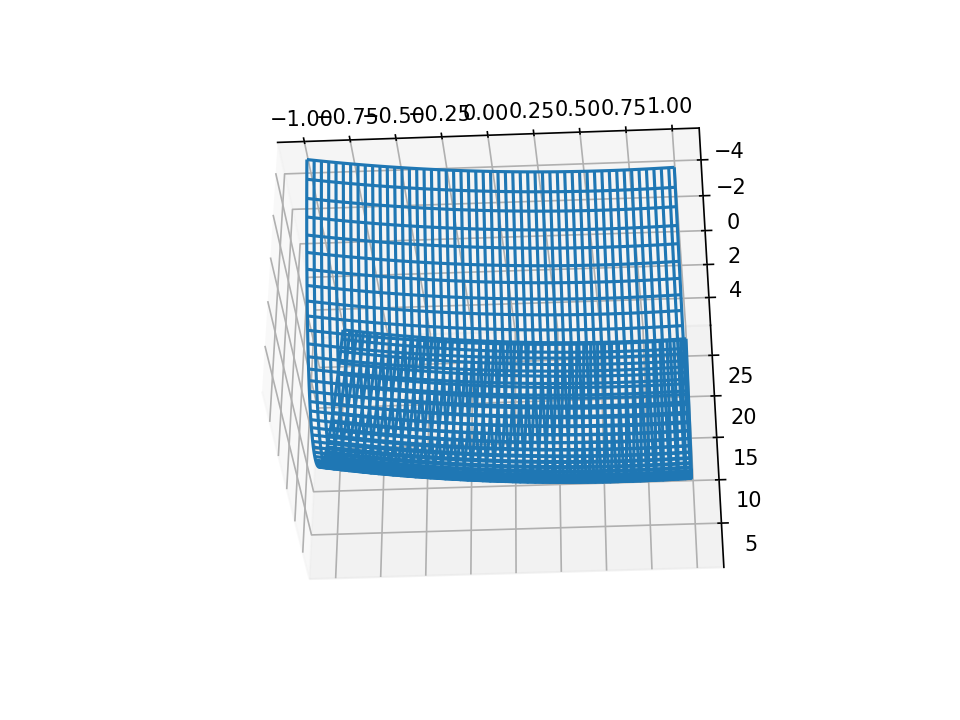

In [63]:
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, L.reshape(ww.shape))

<IPython.core.display.Javascript object>


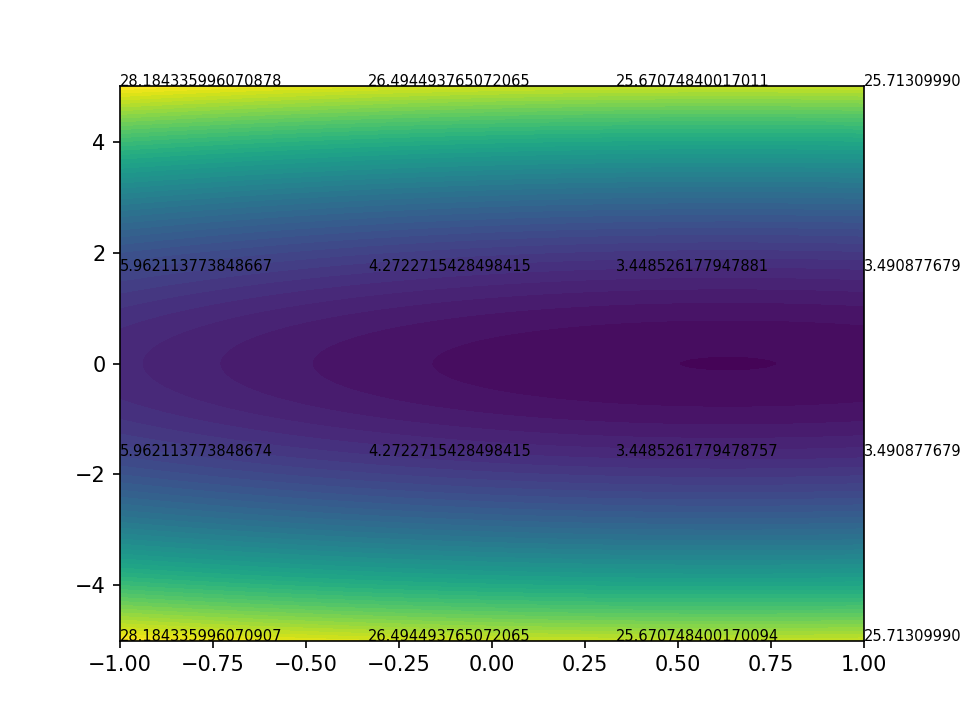

In [64]:
plt.contourf(ww,bb,L.reshape(ww.shape),levels=50)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)

for w in (www):
    for b in bbb:
        plt.text(w,b, 1/len(heights_n) * np.sum((weights_n - w * heights_n - b)**2), fontsize=7)

In [65]:
lr_n = LinearRegression().fit(heights_n.reshape(-1,1),weights_n)

In [66]:
lr_n.coef_

array([0.63406716])

In [67]:
lr_n.intercept_

-9.412150338774612e-16

In [68]:
w = 1
b = 0.5
alpha = 0.001

x = heights_n
N = len(x)
y = weights_n

max_norm = 5
for t in range(10000):
    l = (1/N * np.sum((y - w * x - b)**2))
    d_yh = (w * x + b - y)
    
    d_w = np.mean(d_yh * x)
    d_b = np.mean(d_yh)
    
    norm = np.sqrt(d_w**2 + d_b**2)

        
    if t % 50 == 0:
        print("w,b = ",w,b)
        print("L = ", l)
        print("d_w, d_b", d_w, d_b)
        print("------------------")

    if norm > max_norm:
        reciprocal = norm / max_norm
        d_w /= reciprocal
        d_b /= reciprocal
    w = w - alpha * d_w
    b = b - alpha * d_b

w,b =  1 0.5
L =  0.9630999013650058
d_w, d_b 0.3565499506825029 0.5000000000000014
------------------
w,b =  0.9825915175165336 0.47560281409851574
L =  0.9271792356161823
d_w, d_b 0.33958783954476657 0.4756028140985171
------------------
w,b =  0.9660112068335641 0.45239607355685474
L =  0.8946503202523332
d_w, d_b 0.3234326650331552 0.45239607355685596
------------------
w,b =  0.9502196694261607 0.4303216913415184
L =  0.8651928513474864
d_w, d_b 0.3080460388413261 0.4303216913415197
------------------
w,b =  0.935179381071035 0.40932441473931785
L =  0.8385167773188653
d_w, d_b 0.29339139890556265 0.40932441473931913
------------------
w,b =  0.9208546026806005 0.389351687058495
L =  0.8143594412465521
d_w, d_b 0.27943392252513927 0.38935168705849627
------------------
w,b =  0.9072112953789062 0.3703535160780496
L =  0.7924829931694422
d_w, d_b 0.2661404436157961 0.3703535160780508
------------------
w,b =  0.8942170396176616 0.3522823489160003
L =  0.7726720468484348
d_w, d_b 0.

w,b =  0.6467376074141404 0.015845442943913532
L =  0.5830340658255477
d_w, d_b 0.012345568162946878 0.01584544294391449
------------------
w,b =  0.6461348374328187 0.015072274509525444
L =  0.5829956321620217
d_w, d_b 0.011758253822171922 0.015072274509526392
------------------
w,b =  0.6455607429607604 0.014336832343191204
L =  0.5829608239013063
d_w, d_b 0.011198879721192009 0.014336832343192154
------------------
w,b =  0.6450139598211535 0.013637275615360657
L =  0.5829292990145089
d_w, d_b 0.010666116662087872 0.013637275615361603
------------------
w,b =  0.6444931887350175 0.012971853318605148
L =  0.5829007477451144
d_w, d_b 0.010158698680724556 0.012971853318606116
------------------
w,b =  0.6439971922338269 0.012338899884803514
L =  0.5828748895634733
d_w, d_b 0.0096754200385389 0.012338899884804456
------------------
w,b =  0.6435247917190077 0.011736831016184755
L =  0.5828514704087312
d_w, d_b 0.009215132357432947 0.011736831016185719
------------------
w,b =  0.6430748

w,b =  0.6345058711911332 0.0005021561241767536
L =  0.5826270035371115
d_w, d_b 0.00042746620206806767 0.0005021561241776511
------------------
w,b =  0.6344850002363717 0.00047765373155048954
L =  0.582626962110598
d_w, d_b 0.0004071303999927076 0.0004776537315514315
------------------
w,b =  0.6344651221732188 0.00045434691778009335
L =  0.5826269245877104
d_w, d_b 0.0003877620307668814 0.00045434691778103217
------------------
w,b =  0.6344461897669533 0.0004321773453463525
L =  0.5826268906005553
d_w, d_b 0.0003693150708158828 0.00043217734534730143
------------------
w,b =  0.6344281580299445 0.0004110895232726567
L =  0.5826268598159159
d_w, d_b 0.0003517456860380072 0.0004110895232735767
------------------
w,b =  0.6344109841147547 0.00039103066822973966
L =  0.5826268319319824
d_w, d_b 0.0003350121276480281 0.0003910306682306747
------------------
w,b =  0.6343946272123215 0.0003719505724177285
L =  0.582626806675394
d_w, d_b 0.0003190746329695575 0.0003719505724186607
-------

In [69]:
original_w = w * weights.std() / heights.std()

In [70]:
original_w

1.0527504662656952

In [71]:
original_b = weights.mean() + b * weights.std() - original_w * heights.mean()

In [72]:
original_b

-113.76911888157834

### Логистическая регрессия

Подходы к линейной классификации основываются на создании бинарных линейных классификаторов со следующей интуицией:
Мы считаем один класс положительным (1), другой отрицательным (0 или -1)

1) На входе пример $\pmb{x}$<br>
2) Классификатор вычисляет значение $z = \pmb{w} \cdot \pmb{x} + b$<br>
3) Чем больше z, тем больше модель считает, что $\pmb{x}$ принадлежит положительному классу

Тем не менее, работать с чистыми значениями $z$ неинтуитивно, поэтому имеет смысл ввести его интерпретацию. Некоторые классификаторы назначают линейную гиперплоскость, заданную уравнением $z=0$, как разделитель классов. Следовательно, если $z$ больше нуля для примера $\pmb{x}$, то мы считаем его принадлежим классу 1.

**Логистическая регрессия**, в свою очередь, вводит вероятностную интерпретацию предсказаний. Для этого мы определяем классификатор следующим образом:

Как и раньше мы предсказываем значение $z$ (score положительного класса)
$$z = \pmb{w}\cdot\pmb{x} + b$$
Далее, мы преобразуем это значение в диапазон 0..1 через функцию сигмоиды. Полученный результат мы интерпретируем как вероятность положительного класса ($y=1$), условную от $\pmb{x}$.
$$P(y=1|\pmb{x}) = \sigma(z) = \frac{1}{1+e^{-z}}$$
Вероятность отрицательного класса, следовательно:
$$P(y=0|\pmb{x}) = 1 - P(y=1|\pmb{x}) = 1 - \sigma(z)$$

**Сигмоидная функция** имеет вид
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

In [73]:
%matplotlib inline

[Text(0, 0.5, 'sigma(z)'), Text(0.5, 0, 'z')]

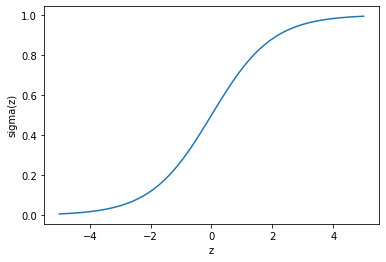

In [74]:
z = np.linspace(-5,5, 50)
s = 1 / (1 + np.exp(-z))

ax = sns.lineplot(x=z,y=s)
ax.set(xlabel="z", ylabel="sigma(z)")

Функция асимптотически стремится к 0 и 1, и имеет значение $1/2$ в точке $0$. Таким образом гиперплоскость
$$z=\pmb{w}\cdot\pmb{x} + b = 0$$
будет являться разделителем классов, если мы будем считать порог вероятности в $1/2$ подходящим.

Мы рассмотрим датасет цифр mnist. Входными данными являются черно-белые картинки цифр размером 28 на 28 пикселей. Выходными данными - цифра от 0 до 9

In [75]:
from sklearn.datasets import fetch_openml

In [76]:
mnist_X, mnist_y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [77]:
mnist_X.shape

(70000, 784)

In [78]:
mnist_y.shape

(70000,)

In [79]:
mnist_y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [80]:
from matplotlib import cm

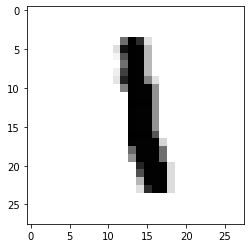

In [86]:
plt.imshow(mnist_X[6].reshape(28,28),cmap=cm.gray_r)

Для начала, попробуем построить классификатор, который отличает цифру 4 от других цифр

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(mnist_X,mnist_y,train_size=5000, test_size=500, stratify=mnist_y)

In [89]:
X_test.shape

(500, 784)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
y_train = np.asarray([int(x) for x in y_train])

In [93]:
y_test = np.asarray([int(x) for x in y_test])

In [94]:
logreg4 = LogisticRegression(penalty='none')

In [144]:
y_train_4 = (y_train==0).astype(np.int)

In [145]:
y_test_4 = (y_test==0).astype(np.int)

In [146]:
print(y_test_4[:20])

[0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [147]:
print(y_test[:20])

[5 0 1 5 2 4 0 7 9 7 1 7 6 2 1 6 8 9 3 2]


In [148]:
logreg4.fit(X_train, y_train_4)

LogisticRegression(penalty='none')

In [149]:
y_pred_4 = logreg4.predict(X_test)

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

In [151]:
print(confusion_matrix(y_test_4, y_pred_4))

[[443   8]
 [  6  43]]


In [152]:
false_positives = np.where((y_pred_4 == 1) & (y_test_4 == 0))[0]

In [153]:
print(false_positives)

[ 26  64  91 179 210 237 294 314]


In [154]:
false_negatives = np.where((y_pred_4 == 0) & (y_test_4 == 1))[0]

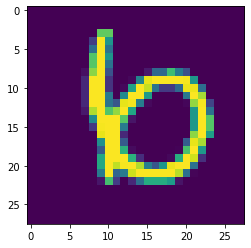

In [155]:
plt.imshow(X_test[false_positives[7]].reshape(28,28))

Визуализируем веса классификатора

In [156]:
print(logreg4.intercept_)

[-0.00811829]


In [157]:
print(logreg4.coef_.max())

0.2568832389048882


In [158]:
print(logreg4.coef_.min())

-0.3846433269222735


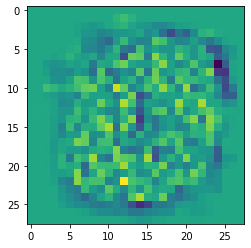

In [159]:
plt.imshow(logreg4.coef_.reshape(28,28))

Как обучается логистическая регрессия.
Один из наивных подходов заключается в том, чтобы пройденный через сигмоид выход сравнивался с истинным (0 или 1) через mse:
$$\hat{y} = P(y=1|\pmb{x}) = \sigma(\pmb{w}\cdot\pmb{x} + b)$$
$$L(y, \hat{y}) = (y - \hat{y})^2$$ 

Однако этот подход порождает несколько проблем, которые делают его плохо подходящим под задачу (чувствительность к выбросам, малые производные по приближении ответа к 0 или 1). Логистическая регрессия по своему определению не может использовать MSE.

Вместо этого мы строим вероятностную модель основываясь на принципе максимизации правдоподобия. Вероятность конкретной модели (плотность вероятности) по формуле Байеса имеет вид:
$$p(\pmb{w},b|X,\pmb{y}) = \frac{p(\pmb{w},b)P(\pmb{y}|\pmb{w},b,X)}{P(\pmb{y}|X)} = \frac{p(\pmb{w},b)P(\pmb{y}|\pmb{w},b,X)}{\int_{\pmb{w},b}p(\pmb{w},b)P(\pmb{y}|\pmb{w},b,X)d(\pmb{w},b)
}$$

Максимум этой величины достигается в точке максимума
$$\pmb{w}^*,b^* = \underset{\pmb{w},b}{{\operatorname{argmax}}} p(\pmb{w},b)P(\pmb{y}|\pmb{w},b,X)$$

Если мы считаем, что гипотезы (веса и смещение) равновероятны, то мы переходим к максимизации правдоподобия с использованием нашей вероятностной модели

$$\pmb{w}^*,b^* = \underset{\pmb{w},b}{{\operatorname{argmax}}} P(\pmb{y}|\pmb{w},b,X)$$

Величина $P(\pmb{y}|\pmb{w},b,X)$ - это вероятность корректных ответов при условии выбранной гипотезы $(\pmb{w},b)$ и заданных входных примером $X$. Предположив, что ответы независимы друг от друга при известной гипотезе, мы можем разложить эту величину по экземплярам.
$$P(\pmb{y}|\pmb{w},b,X) = \prod_{i=1}^N P(y_i|\pmb{w}, b, \pmb{x}^{(i)})$$

Вероятность класса для одного экземпляра в нашей модели представляется как:
$$P(y_i|\pmb{w}, b, \pmb{x}^{(i)}) = \begin{cases}
    \sigma(\pmb{w}\cdot\pmb{x}^{(i)} + b),& \text{if } y_i = 1\\
    1 - \sigma(\pmb{w}\cdot\pmb{x}^{(i)} + b),              & \text{if } y_i = 0
\end{cases}$$

Поэтому максимизируемую величину можно представить как

$$z_i = \pmb{w}\cdot\pmb{x}^{(i)} + b$$
$$P(\pmb{y}|\pmb{w},b,X) = \prod_{i=1}^N P(y_i|\pmb{w}, b, \pmb{x}^{(i)}) = \prod_{i=1: y_i=1}^N \sigma(z_i) * \prod_{i=1: y_i=0}^N 1 - \sigma(z_i)$$
или

$$P(\pmb{y}|\pmb{w},b,X) = \prod_{i=1}^N \sigma(z_i)^{y_i} * \sigma(1 - z_i)^{1 - y_i}$$

Проблемы:
- Эту величину сложно дифференцировать 
- Произведение множества величин от 0 до 1 неизбежно становится меньше, на компьютерах может привести к underflow

Решение - прологарифмировать. Логарифм - монотонная функция и максимум величины $P(\pmb{y}|\pmb{w},b,X)$ совпадает с максимумом $\log P(\pmb{y}|\pmb{w},b,X)$

При этом:
$$\log P(\pmb{y}|\pmb{w},b,X)= \sum_{i=1}^n logP(y_i|\pmb{w}, b, \pmb{x}^{(i)})$$
следовательно:
$$\log P(\pmb{y}|\pmb{w},b,X)=\sum_{i=1}^n log p_i$$
где:
$$
p_i = 
\begin{cases}
    \sigma(\pmb{w}\cdot\pmb{x}^{(i)} + b),& \text{if } y_i = 1\\
    1 - \sigma(\pmb{w}\cdot\pmb{x}^{(i)} + b),              & \text{if } y_i = 0
\end{cases}$$

или:
$$\log P(\pmb{y}|\pmb{w},b,X) = \sum_{i=1}^N y_i\log\sigma(z_i) * (1 - y_i)\log\sigma(1 - z_i)$$


Полученный критерий обычно усредняют и берут со знаком минус. В таком случае значения критерия становятся положительными и его нужно минимизировать. Этот критерий называется negative-log-likelihood или просто log-loss
$$L = -\frac{1}{n}\sum_{i=1}^n log p_i = -\frac{1}{n}\sum_{i=1}^n L_i$$. 

Логистическая регрессия не имеет аналитического решения, но его можно найти градентным спуском. Найдём производные по весам и смещению. 

Отметим, что производную среднего можно записать как среднее производных функции потерь на отдельных примерах данных

$$\frac{\partial L}{\partial w_j} = -\frac{1}{n} \sum_{i=1}^n\frac{\partial L_i}{\partial w_j}$$
$$\frac{\partial L}{\partial b} = -\frac{1}{n} \sum_{i=1}^n \frac{\partial L_i}{\partial b}$$

Вспомним выражение
score положительного класса
$$ z_i = \pmb{w} \cdot \pmb{x}^{(i)} + b $$
вероятность **корректного класса**
$$ p_i = \begin{cases}
    \sigma(z_i),& \text{if } y_i = 1\\
    1 - \sigma(z_i),              & \text{if } y_i = 0
\end{cases}$$

где
$$\sigma(z_i) = \frac{1}{1 + e^{-z_i}}$$

логарифм правдоподобия на одном экземпляре данных
$$ L_i = \log p_i$$

Без выведения сразу укажем, что производная сигмоиды $$\sigma'(z) = \sigma(z) (1 - \sigma(z)$$

Выведем производные по одному экземпляру
$$\frac{\partial L_i}{\partial w_j} = \frac{\partial L_i}{\partial p_i} \frac{\partial p_i}{\partial z_i} \frac{\partial z_i}{\partial w_j}$$

$$\frac{\partial L_i}{\partial b} = \frac{\partial L_i}{\partial p_i} \frac{\partial p_i}{\partial z_i} \frac{\partial z_i}{\partial b} = \frac{\partial L_i}{\partial p_i} \frac{\partial p_i}{\partial z_i} $$

Начнем с $\frac{\partial L_i}{\partial p_i}$:
$$\frac{\partial L_i}{\partial p_i} = \frac{1}{p_i}$$
Далее:
$$\frac{\partial p_i}{\partial z_i} = 
\begin{cases}
    \sigma(z_i)(1-\sigma(z_i),& \text{if } y_i = 1\\
    -\sigma(z_i)(1-\sigma(z_i),& \text{if } y_i = 0
\end{cases}$$ 

И напоследок:
$$\frac{\partial z_i}{\partial w_j} = x^{(i)}_j$$

Итого:

если $y_i = 1$:
$$\frac{\partial L_i}{\partial w_j} = \frac{1}{\sigma(z_i)} \sigma(z_i)(1-\sigma(z_i))  x^{(i)}_j = (1-\sigma(z_i))  x^{(i)}_j$$
если $y_i = 0$:
$$\frac{\partial L_i}{\partial w_j} = -\frac{1}{1 - \sigma(z_i)} \sigma(z_i)(1-\sigma(z_i))  x^{(i)}_j = -\sigma(z_i)  x^{(i)}_j$$

Соответственно, после того, как мы получили формулы градиента, мы можем проводить градиентный спуск как и ранее:


$$\pmb{w}_{t} = \pmb{w}_{t-1} + \alpha \underset{\pmb{w_{t-1}}}{\nabla L}$$
$$b_t = b_{t-1} + \alpha\frac{\partial L}{\partial b_{t-1}}$$

### Стохастический градиентный спуск

Реализуем ранее использованную логистическую регрессию

In [160]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [161]:
EPS = 0.0000001

In [162]:
0 ** 0.5

0.0

In [179]:
class BinaryLogistic:
    def __init__(self, input_size, normalize=True, decay_rate=0.9):
        self.w = np.random.normal(scale=0.2,size=input_size)
        self.b = 0.0
        
        self.dw = None
        self.db = None
        
        self.normalize = normalize
        self.means = None
        self.stds = None
        
        self.decay_rate = decay_rate
        self.w_cache = np.zeros(len(self.w))
        self.b_cache = 0

    def forward(self, X):
#         print(X.shape)
        z = np.dot(X,self.w) + self.b
        s = sigmoid(z) 
        s = np.clip(s,EPS,1-EPS)
        return s,z

    def loss(self, s, y):
        "Для диагностики"
        p = np.copy(s)
        mask = y < 1.0
        p[mask] = 1 - p[mask]
    
        
        return -np.mean(np.log(p))
    
    def compute_gradient(self, X, y, s, z):
        mask = y > 0.1

        ds = np.zeros(len(y))
        ds[mask] = 1/s[mask]
        ds[~mask] = -1/(1-s[~mask])
        
        dz = ds*s*(1-s)
        db = -(dz.mean())
        dw = X.T.dot(dz) / -len(X)
        
        self.dw = dw
        self.db = db
        
    def iter_batch(self, X, y, alpha):
        s,z = self.forward(X)
#         print(self.means)
#         print(self.stds)
#         print(s)
#         print(s.max())
#         print(s.min())
# #         print(z)
#         raise ValueError()
        
#         print(s.shape, z.shape)
        loss = self.loss(s, y)
#         raise ValueError()
        
        self.compute_gradient(X,y,s,z)
        
        decay_rate = self.decay_rate
        self.w_cache = decay_rate * self.w_cache + (1 - decay_rate) * self.dw **2
        self.b_cache = decay_rate * self.b_cache + (1 - decay_rate) * self.db **2
        # x += - learning_rate * dx / (np.sqrt(cache) + eps)
        self.w -= alpha * self.dw  / (np.sqrt(self.w_cache) + EPS)
        self.b -= alpha * self.db  / (np.sqrt(self.b_cache) + EPS)
        return loss
    
        
    def train_standard(self, X, y, n_iterations, print_interval=10, alpha=0.001):
        if self.normalize:
            self.means = X.mean(axis=0)
            self.stds = X.std(axis=0) + EPS
        X = (X - self.means) / self.stds
        for i in range(n_iterations):
            loss = self.iter_batch(X,y, alpha)
            if i % print_interval == 0:
                print(f"Iter {i+1} Loss: {loss}")
                print("|dw|", np.linalg.norm(self.dw))
                print("|db|", self.db)
                
    def train_stochastic(self, X, y, n_epochs, batch_size, print_interval=10, alpha=0.001):
        if self.normalize:
            self.means = X.mean(axis=0)
            self.stds = X.std(axis=0) + EPS
        X = (X - self.means) / self.stds
        
        global_step = 0
        for epoch in range(n_epochs):
            offset = 0
            while offset < len(X):
                X_batch,y_batch = X[offset:offset+batch_size], y[offset:offset+batch_size]
                loss = self.iter_batch(X_batch,y_batch, alpha)
                
                if global_step % print_interval == 0:
                    print(f"Iter {global_step+1} Loss: {loss}")
                    print("|dw|", np.linalg.norm(self.dw))
                    print("|db|", self.db)
                    
                global_step += 1
                offset += batch_size
        
    def predict(self, X, threshold):
        if self.normalize:
            X = (X - self.means) / self.stds
        s, z = self.forward(X)
        result = np.zeros(len(X), dtype=np.int)
        result[s >= threshold] = 1
        return result
    

In [180]:
X_train.shape

(5000, 784)

In [181]:
bl = BinaryLogistic(X_train.shape[1])

In [182]:
bl.train_stochastic(X_train, y_train_4, 100, 64, 10, 0.0001)

Iter 1 Loss: 1.7343696810852758
|dw| 2.930803497400231
|db| 0.3416635614769548
Iter 11 Loss: 2.55088829798924
|dw| 2.882561665240291
|db| 0.46992451142648345
Iter 21 Loss: 2.148118022533446
|dw| 3.0033839197832193
|db| 0.39343308090121654
Iter 31 Loss: 1.950654419497373
|dw| 2.458050474054293
|db| 0.42137329816550784
Iter 41 Loss: 1.7734197662880549
|dw| 2.377518062883664
|db| 0.45185203110418193
Iter 51 Loss: 1.891901938060017
|dw| 2.91814405355876
|db| 0.39061131643086955
Iter 61 Loss: 1.7221942178200143
|dw| 2.4883902539693223
|db| 0.36199442009841776
Iter 71 Loss: 1.8082582962990024
|dw| 2.876024660196824
|db| 0.3536700706440834
Iter 81 Loss: 2.3910189838041953
|dw| 2.8549611031727697
|db| 0.5125194109670145
Iter 91 Loss: 1.9953438217375934
|dw| 2.8800876760452545
|db| 0.37797550692698956
Iter 101 Loss: 2.59598227783961
|dw| 2.6068840498867973
|db| 0.45323287860645955
Iter 111 Loss: 2.098347650640396
|dw| 2.886085162149891
|db| 0.3609820761476193
Iter 121 Loss: 1.7223877004415096
|

Iter 1051 Loss: 1.223545798638129
|dw| 1.765956937498314
|db| 0.33661257550099216
Iter 1061 Loss: 0.9768613084219655
|dw| 2.549881333990292
|db| 0.31894206504510164
Iter 1071 Loss: 1.392553741544518
|dw| 2.4847376972141904
|db| 0.379093521525826
Iter 1081 Loss: 1.3071242743482876
|dw| 2.7365847883342074
|db| 0.36758163947993444
Iter 1091 Loss: 1.0622697255810398
|dw| 1.5333961120641602
|db| 0.3720756725839553
Iter 1101 Loss: 1.2150950911130054
|dw| 2.3366854209661616
|db| 0.3931113118358292
Iter 1111 Loss: 1.0369834144984025
|dw| 1.9971899957086263
|db| 0.34166637611094586
Iter 1121 Loss: 1.721196135846011
|dw| 2.7058271365643973
|db| 0.43981946230060326
Iter 1131 Loss: 1.1559650432213098
|dw| 1.5575747526270494
|db| 0.3987090830639351
Iter 1141 Loss: 0.9618374693683232
|dw| 2.5627955991496862
|db| 0.40408538704812114
Iter 1151 Loss: 1.1048497378362336
|dw| 2.0353203695773825
|db| 0.2655999805428686
Iter 1161 Loss: 0.9895088453862935
|dw| 1.6556822579225854
|db| 0.2971955222630156
Iter

Iter 2051 Loss: 0.7615583838937093
|dw| 1.8074937687023505
|db| 0.29299468889744906
Iter 2061 Loss: 0.8826818843574972
|dw| 2.2790868865854623
|db| 0.2915140851776674
Iter 2071 Loss: 0.6185070840172734
|dw| 1.1654757734044727
|db| 0.2760117228029314
Iter 2081 Loss: 0.7267399411766424
|dw| 1.3706937558557126
|db| 0.2834219486174532
Iter 2091 Loss: 0.6484720992682204
|dw| 1.9991577324205296
|db| 0.2719878588371803
Iter 2101 Loss: 0.7952060729228815
|dw| 1.3933453579552388
|db| 0.3033002514231623
Iter 2111 Loss: 0.6846651289990018
|dw| 1.1440229503137476
|db| 0.27357972314700574
Iter 2121 Loss: 0.7068079267423246
|dw| 2.0743629301101256
|db| 0.3219696509194441
Iter 2131 Loss: 0.9991759421969351
|dw| 2.603402954866823
|db| 0.3258665128836935
Iter 2141 Loss: 0.6886394739040834
|dw| 1.603238971938629
|db| 0.3087053899726152
Iter 2151 Loss: 0.8586157194630584
|dw| 2.004528768848053
|db| 0.33857055573999084
Iter 2161 Loss: 0.857764311651332
|dw| 2.1767760896622264
|db| 0.3594007527854155
Iter 

Iter 3071 Loss: 0.6161671971660094
|dw| 1.257848124659574
|db| 0.20161507741095544
Iter 3081 Loss: 0.1888076192235158
|dw| 1.4446903526478463
|db| 0.1642678438051498
Iter 3091 Loss: 1.0234894045743848
|dw| 2.7096530947005513
|db| 0.3015901347978739
Iter 3101 Loss: 0.4803781771750961
|dw| 0.99701011357681
|db| 0.23166779963645512
Iter 3111 Loss: 0.45879413859653034
|dw| 1.364980762464702
|db| 0.23726524039665675
Iter 3121 Loss: 0.43011611555098195
|dw| 0.9699929261706012
|db| 0.19896231366102302
Iter 3131 Loss: 0.9795170654635956
|dw| 2.090648867198628
|db| 0.34846095345719463
Iter 3141 Loss: 0.9080029022134026
|dw| 2.938106926718201
|db| 0.26725917351000295
Iter 3151 Loss: 0.9582522450418478
|dw| 2.1246903576347638
|db| 0.2920174155665415
Iter 3161 Loss: 0.7291548816969958
|dw| 2.1407668419756507
|db| 0.2647413733916989
Iter 3171 Loss: 0.46866603247283833
|dw| 1.4358211256499493
|db| 0.24340732224829276
Iter 3181 Loss: 0.6102171521861636
|dw| 1.6455587589725986
|db| 0.2243050827483598


Iter 4391 Loss: 0.5516811235969317
|dw| 1.3967635063271542
|db| 0.27320650824750703
Iter 4401 Loss: 0.32755003303575175
|dw| 0.9452505324271958
|db| 0.20062826638475484
Iter 4411 Loss: 0.6093841979924384
|dw| 1.3260030959706626
|db| 0.2528534041503091
Iter 4421 Loss: 0.43021311689543984
|dw| 1.5563671459165946
|db| 0.20438794466962687
Iter 4431 Loss: 0.7267904738972826
|dw| 2.1816996897916425
|db| 0.24298310595222572
Iter 4441 Loss: 0.41742893657194663
|dw| 0.9151837726149317
|db| 0.22110548849135436
Iter 4451 Loss: 0.5086103817777476
|dw| 1.1250628667222762
|db| 0.23727897836817136
Iter 4461 Loss: 0.5743338912225725
|dw| 1.9538062814069261
|db| 0.23825682791128783
Iter 4471 Loss: 0.5369229828601884
|dw| 1.1685157658605618
|db| 0.2473412963527246
Iter 4481 Loss: 0.5703861722974635
|dw| 1.108226663930925
|db| 0.2560983614957689
Iter 4491 Loss: 0.46242637073687237
|dw| 1.6045691404346443
|db| 0.2555385313823525
Iter 4501 Loss: 0.7506965415361253
|dw| 2.4995901768220454
|db| 0.28145804808

Iter 5441 Loss: 0.49476639635964204
|dw| 1.2039885106988821
|db| 0.17792831431052247
Iter 5451 Loss: 0.19155552215685617
|dw| 1.3496130027198834
|db| 0.1682144986927916
Iter 5461 Loss: 0.8934283775967131
|dw| 2.650642044748314
|db| 0.25898094900621943
Iter 5471 Loss: 0.3931827996045163
|dw| 0.9629807130517047
|db| 0.2085511138090832
Iter 5481 Loss: 0.40940694076241513
|dw| 1.3765872161092252
|db| 0.20975106689859654
Iter 5491 Loss: 0.31874112386624026
|dw| 0.8619341751327446
|db| 0.17230230975618305
Iter 5501 Loss: 0.703960690162257
|dw| 1.77547548064625
|db| 0.2969122244947978
Iter 5511 Loss: 0.7193526325629297
|dw| 2.8836000254576293
|db| 0.22926681103607066
Iter 5521 Loss: 0.6842975692429936
|dw| 2.0125932650181424
|db| 0.2600806556091632
Iter 5531 Loss: 0.6171724205422627
|dw| 2.039959372702145
|db| 0.24146553689093672
Iter 5541 Loss: 0.3070142737860493
|dw| 1.0827395742813142
|db| 0.1905284989821073
Iter 5551 Loss: 0.5009221472311587
|dw| 1.456366909685982
|db| 0.19707838115982615

Iter 6561 Loss: 0.782077285278477
|dw| 2.779585182098607
|db| 0.23235156826521952
Iter 6571 Loss: 0.5025840711190854
|dw| 0.9733807019584942
|db| 0.2846216648401956
Iter 6581 Loss: 0.7447628540490616
|dw| 1.72431114606077
|db| 0.26348100970111576
Iter 6591 Loss: 0.7175309358580697
|dw| 2.42628164111385
|db| 0.2155506480421968
Iter 6601 Loss: 0.8752037437625007
|dw| 2.9666079369780545
|db| 0.28066055266292045
Iter 6611 Loss: 0.6860977376124995
|dw| 2.175735416953381
|db| 0.23497223619115834
Iter 6621 Loss: 0.5030590028629336
|dw| 1.0082804384741488
|db| 0.2512212098433203
Iter 6631 Loss: 0.6636375122913748
|dw| 1.9220589034205364
|db| 0.24792601460337582
Iter 6641 Loss: 0.5840866564419988
|dw| 1.7760613234468254
|db| 0.2546953052565821
Iter 6651 Loss: 0.7019861716239311
|dw| 1.9857468738011854
|db| 0.2825795120101263
Iter 6661 Loss: 0.5135095609603297
|dw| 1.0904125197022543
|db| 0.2671808001877028
Iter 6671 Loss: 0.7407544082225199
|dw| 2.250172540390034
|db| 0.3045853073646345
Iter 66

Iter 7711 Loss: 0.362819076511788
|dw| 1.042373327940528
|db| 0.23218348883969667
Iter 7721 Loss: 0.7778105411916967
|dw| 2.7774803225670945
|db| 0.2479252619742493
Iter 7731 Loss: 0.2507606587268377
|dw| 0.96784216846861
|db| 0.18585253096961887
Iter 7741 Loss: 0.545531993038098
|dw| 1.87307161952767
|db| 0.20157707093365076
Iter 7751 Loss: 0.4973482434085015
|dw| 1.5467672781592647
|db| 0.22508826634651904
Iter 7761 Loss: 0.3139741227575889
|dw| 1.2348284198545387
|db| 0.19723349631070194
Iter 7771 Loss: 0.6522660811013445
|dw| 2.4735805321743953
|db| 0.26316872636058786
Iter 7781 Loss: 0.5765659038687418
|dw| 2.4707200964542766
|db| 0.21757766959805036
Iter 7791 Loss: 0.3503585207905493
|dw| 1.4511255764126108
|db| 0.17259024906859438
Iter 7801 Loss: 0.3664136660945072
|dw| 1.03090104907249
|db| 0.19363111039474132
Iter 7811 Loss: 0.41313051919848764
|dw| 1.1725020896616456
|db| 0.16183253533076863
Iter 7821 Loss: 0.18471434412940188
|dw| 1.2832249071476196
|db| 0.16427280879697814


In [192]:
bl_pred = bl.predict(X_test, 0.9)


In [193]:
print(bl_pred)

[0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [194]:
print(confusion_matrix(y_test_4, bl_pred))

[[431  20]
 [  9  40]]
